In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # 한 실행칸에 프린트 여러개 해도 다 출력시키도록 하는 코드.
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
pd.set_option('display.max_rows', 500)
from datetime import datetime
import scipy as sp
import scipy.stats
from scipy.optimize import minimize, minimize_scalar
from scipy.interpolate import interp1d

# 1번

## (1)

In [2]:
f1 = open("./data1.txt", 'r', encoding = 'utf-8')
arr = []
while True:
    line = f1.readline()
    if not line: 
        break
    else:
        tmp = line.split()
        for i in range(len(tmp)):
            arr.append(tmp[i])

In [3]:
for i in range(len(arr)):
    s = arr[i]
    if(s[-1].isalpha() == False):
        arr[i] = s[:-1]
    arr[i] = arr[i].lower()

In [4]:
arr_unique = list(set(arr))

In [5]:
print('# of words = {}'.format(len(arr)))

# of words = 499


## (2)

In [6]:
freq = dict(zip(arr_unique, np.zeros(len(arr_unique))))
freq

{'': 0.0,
 'adjustments': 0.0,
 'evans': 0.0,
 'business': 0.0,
 'k': 0.0,
 'evolve': 0.0,
 'committee': 0.0,
 'soft': 0.0,
 'levels': 0.0,
 'a': 0.0,
 'policy': 0.0,
 'help': 0.0,
 'relative': 0.0,
 'employment': 0.0,
 'take': 0.0,
 'wide': 0.0,
 'auction': 0.0,
 'were': 0.0,
 'household': 0.0,
 'measures': 0.0,
 'carefully': 0.0,
 'mortgage-backed': 0.0,
 'run': 0.0,
 'principal': 0.0,
 'some': 0.0,
 'monitor': 0.0,
 'supporting': 0.0,
 'however': 0.0,
 'late': 0.0,
 'as': 0.0,
 'low': 0.0,
 'range': 0.0,
 'way': 0.0,
 'normalization': 0.0,
 'over': 0.0,
 'voting': 0.0,
 'debt': 0.0,
 'patrick': 0.0,
 'neel': 0.0,
 'risks': 0.0,
 'its': 0.0,
 'fischer': 0.0,
 'balanced': 0.0,
 'the': 0.0,
 'survey-based': 0.0,
 'return': 0.0,
 'with': 0.0,
 'daniel': 0.0,
 'sentiment': 0.0,
 'conditions': 0.0,
 'until': 0.0,
 'charles': 0.0,
 'reinvesting': 0.0,
 'objective': 0.0,
 'continues': 0.0,
 'path': 0.0,
 'expand': 0.0,
 'near': 0.0,
 'closely': 0.0,
 'at': 0.0,
 'lael': 0.0,
 'view': 0.0,
 

In [7]:
for i in range(len(arr)):
    s = arr[i]
    freq[s] = freq[s] + 1

In [8]:
freq.pop('')
freq

5.0

{'adjustments': 2.0,
 'evans': 1.0,
 'business': 2.0,
 'k': 1.0,
 'evolve': 1.0,
 'committee': 9.0,
 'soft': 1.0,
 'levels': 2.0,
 'a': 5.0,
 'policy': 5.0,
 'help': 1.0,
 'relative': 1.0,
 'employment': 2.0,
 'take': 1.0,
 'wide': 1.0,
 'auction': 1.0,
 'were': 1.0,
 'household': 1.0,
 'measures': 4.0,
 'carefully': 1.0,
 'mortgage-backed': 2.0,
 'run': 1.0,
 'principal': 1.0,
 'some': 2.0,
 'monitor': 2.0,
 'supporting': 1.0,
 'however': 1.0,
 'late': 1.0,
 'as': 1.0,
 'low': 2.0,
 'range': 3.0,
 'way': 1.0,
 'normalization': 1.0,
 'over': 2.0,
 'voting': 1.0,
 'debt': 1.0,
 'patrick': 1.0,
 'neel': 1.0,
 'risks': 1.0,
 'its': 6.0,
 'fischer': 1.0,
 'balanced': 1.0,
 'the': 32.0,
 'survey-based': 1.0,
 'return': 1.0,
 'with': 2.0,
 'daniel': 1.0,
 'sentiment': 1.0,
 'conditions': 7.0,
 'until': 1.0,
 'charles': 1.0,
 'reinvesting': 1.0,
 'objective': 1.0,
 'continues': 1.0,
 'path': 1.0,
 'expand': 2.0,
 'near': 1.0,
 'closely': 1.0,
 'at': 5.0,
 'lael': 1.0,
 'view': 1.0,
 'below': 

In [9]:
freq_df = pd.DataFrame.from_dict(freq, orient='index')
freq_df

,0
adjustments,2.0
evans,1.0
business,2.0
k,1.0
evolve,1.0
committee,9.0
soft,1.0
levels,2.0
a,5.0
policy,5.0


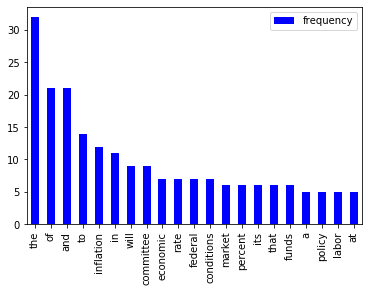

In [10]:
freq_df.sort_values(0, ascending = False, inplace = True)
freq_df = freq_df[freq_df[0] >= 5]
freq_df.columns = ['frequency']
freq_df.plot(kind = 'bar', color = 'b')

# 2번

## (1)

In [11]:
def expected_total(_lambda):
    sum = 0
    for i in range(1, 101):
        sum = sum + np.e ** ((-1) * _lambda * i)
    return sum

In [12]:
print('Expectation = {}'.format(round(expected_total(0.01), 3)))

Expectation = 62.897


## (2)

In [13]:
def opti_func(x):
    sum = 0
    for i in range(1, 101):
        sum = sum + np.e ** ((-1) * x * i)
    return abs(sum - 80)

In [14]:
print("Lambda = {}%".format(round(minimize_scalar(opti_func).x * 100, 4)))

Lambda = 0.4592%


# 3번

## (1)

In [15]:
data3 = pd.read_excel('./data3.xlsx')
data3.head()

,X,Y
0,5,15
1,21,5
2,11,16
3,14,1
4,1,19


In [16]:
def sum_distance(x, y):
    n2 = np.array(data3) - [x, y]
    n3 = np.square(n2).sum(axis = 1)
    return round(np.sqrt(n3).sum(), 3)

In [17]:
print('distance from ({}, {}) = {}'.format(10, 10, sum_distance(10, 10)))

distance from (10, 10) = 382.978


In [18]:
def opt_sum_distance(x):
    n2 = np.array(data3) - [x[0], x[1]]
    n3 = np.square(n2).sum(axis = 1)
    return np.sqrt(n3).sum()

In [19]:
opt_res = minimize(opt_sum_distance, [10, 10])

In [20]:
print('x = {} and y = {}\nMin distance = {}'.format(round(opt_res.x[0], 2), round(opt_res.x[1], 2), round(opt_res.fun, 2)))

x = 14.57 and y = 11.87
Min distance = 360.06


## (2)

In [21]:
def func3(n):
    rv1 = sp.stats.norm(loc = 6, scale = 1)
    sample1 = rv1.rvs(size = [10000, n], random_state = 0)
    rv2 = sp.stats.norm(loc = 7, scale = 1)
    sample2 = rv2.rvs(size = [10000, n], random_state = 2)
    result = sample1.max(axis = 1) > sample2.max(axis = 1)
    return result.sum()/10000

In [22]:
print('Prob of Win = {}'.format(func3(3)))

Prob of Win = 0.1675


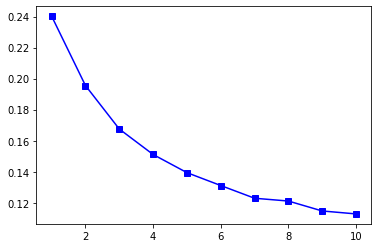

In [23]:
arr3 = []
for i in range(1, 11):
    arr3.append(func3(i))
plt.plot(np.arange(1, 11), arr3, 'b', marker='s')

## (3)

In [43]:
rv1 = sp.stats.norm(loc = 6, scale = 1)
sample1 = rv1.rvs(size = [10000, 10], random_state = 0)
sample1 = sample1.cumsum(axis = 1)
rv2 = sp.stats.norm(loc = 7, scale = 1)
sample2 = rv2.rvs(size = [10000, 10], random_state = 2)
sample2 = sample2.cumsum(axis = 1)
result1 = sample1 > 40
result2 = sample2 > 40
result1 = result1.sum(axis = 1)
result2 = result2.sum(axis = 1)

case_win = result1 > result2
case_draw = result1 == result2
case_lose = result1 < result2

print("W : {}%\nT : {}%\nL : {}%".format(round(case_win.sum()/100, 2), round(case_draw.sum()/100, 2), round(case_lose.sum()/100, 2)))

W : 1.08%
T : 18.93%
L : 79.99%


# 5번

In [67]:
x = pd.read_csv('./data5.csv')
x.head()

,DATE,CMT2,CMT10,EINF
0,2010-01-01,NaN,NaN,2.8
1,2010-01-04,1.09,3.85,NaN
2,2010-01-05,1.01,3.77,NaN
3,2010-01-06,1.01,3.85,NaN
4,2010-01-07,1.03,3.85,NaN


In [68]:
x.dtypes

DATE      object
CMT2     float64
CMT10    float64
EINF     float64
dtype: object

## (1)

In [69]:
x['DATE'] = pd.to_datetime(x.DATE)
x.head()
x.dtypes
x.set_index('DATE', inplace = True)
x.head()

,DATE,CMT2,CMT10,EINF
0,2010-01-01,NaN,NaN,2.8
1,2010-01-04,1.09,3.85,NaN
2,2010-01-05,1.01,3.77,NaN
3,2010-01-06,1.01,3.85,NaN
4,2010-01-07,1.03,3.85,NaN


DATE     datetime64[ns]
CMT2            float64
CMT10           float64
EINF            float64
dtype: object

,CMT2,CMT10,EINF
DATE,,,
2010-01-01,NaN,NaN,2.8
2010-01-04,1.09,3.85,NaN
2010-01-05,1.01,3.77,NaN
2010-01-06,1.01,3.85,NaN
2010-01-07,1.03,3.85,NaN


In [70]:
x.fillna(method = 'ffill', inplace = True)

In [71]:
x.isna().sum()

CMT2     1
CMT10    1
EINF     0
dtype: int64

In [72]:
x.fillna(method = 'bfill', inplace = True)
x

,CMT2,CMT10,EINF
DATE,,,
2010-01-01,1.09,3.85,2.8
2010-01-04,1.09,3.85,2.8
2010-01-05,1.01,3.77,2.8
2010-01-06,1.01,3.85,2.8
2010-01-07,1.03,3.85,2.8
...,...,...,...
2017-03-10,1.36,2.58,2.7
2017-03-13,1.40,2.62,2.7
2017-03-14,1.40,2.60,2.7


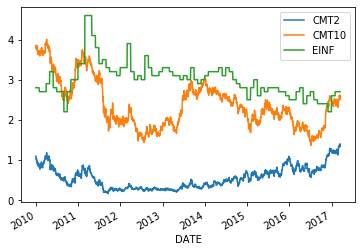

In [73]:
x.plot()
plt.show()

## (2)

In [74]:
x['term_spread'] = x['CMT2'] - x['CMT10']
x['term_spread'] = x['term_spread'].apply(lambda a: abs(a))
x.head(10)

,CMT2,CMT10,EINF,term_spread
DATE,,,,
2010-01-01,1.09,3.85,2.8,2.76
2010-01-04,1.09,3.85,2.8,2.76
2010-01-05,1.01,3.77,2.8,2.76
2010-01-06,1.01,3.85,2.8,2.84
2010-01-07,1.03,3.85,2.8,2.82
2010-01-08,0.96,3.83,2.8,2.87
2010-01-11,0.95,3.85,2.8,2.90
2010-01-12,0.92,3.74,2.8,2.82
2010-01-13,0.97,3.80,2.8,2.83


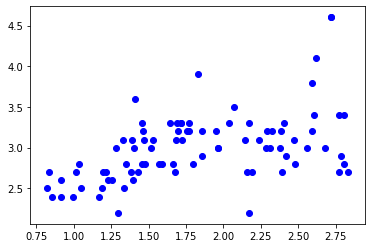

In [81]:
res5 = x.resample('M').mean()
plt.scatter(res5['term_spread'], res5['EINF'], color = 'b')
plt.show()